# 1. Project Design

Yang ingin dilakukan dengan kedua berita di atas adalah

1. melihat perbandingan berita terbanyak di antara dua akun Twitter dan Facebook.
2. Melihat ke samaan berita dr kedua akun tersebut.
3. Melihat presentase dr waktu ke waktu tertinggi masyarakat membicarakan tentang tik-tok Shop banned.
4. Melihat respon positif dan negatif dan Netral
5. Membuat penjelasan Code di Word seperti Report


# 2. Explore

## Import all libraries

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade gensim

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 38.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
"""Other"""
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

"""Preprocessing"""
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import unicodedata
import string
import ast

"""Data Handling and Visualization"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from wordcloud import WordCloud
import networkx as nx

"""Natural Language Processing"""
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import word_tokenize, sent_tokenize
import spacy
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch

# Gensim
import gensim
import gensim.corpora as corpora
from gensim import similarities
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim

"""Utility"""
import time
from datetime import timedelta
import random

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Data Understanding

In [ ]:
# Import dataset
df = pd.read_excel("/content/tiktok-banned-fb-x.xlsx", index_col=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Apps,Time,News Account,Headline News,Comment Account,Comment
No,,,,,,
630,FB,2023-10-05 00:00:00,Kompas.com,"Tiktok Sho Ditutup, Seller Live Pamitan Sambil...",Aan Ox,Syukurlah ditutup. Semoga pedagang tradisional...
564,FB,2023-10-05 00:00:00,detikcom,Lady Nayoan turut bersedih dengan ditutupnya T...,Hendro Wibowo,Turut berduka cita bagi mereka yg terdampak at...
369,X,2023-09-20 00:00:00,CNN INDONESIA,Jerit Bersahutan dari Para Pedagang Akibat 'Ma...,masss_oldi,Males belajar\n Males mikir\n Ga berusaha utk ...
557,FB,2023-10-04 00:00:00,detikcom,TikTok Shop ditutup sore ini. Melaney Ricardo ...,Cak Met,Bukan di tutup tp atur ulang..
59,X,2023-09-28 00:00:00,detikcom,Crazy Rich Surabaya Tom Liwafa tak setuju deng...,kinaw81,Saran sih dipisahkan yg mana utk medsos&yg man...


## EDA

In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Apps               0
Time               0
News Account       0
Headline News      0
Comment Account    0
Comment            0
dtype: int64

In [ ]:
df.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
df['Apps'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Apps
X     501
FB    336
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


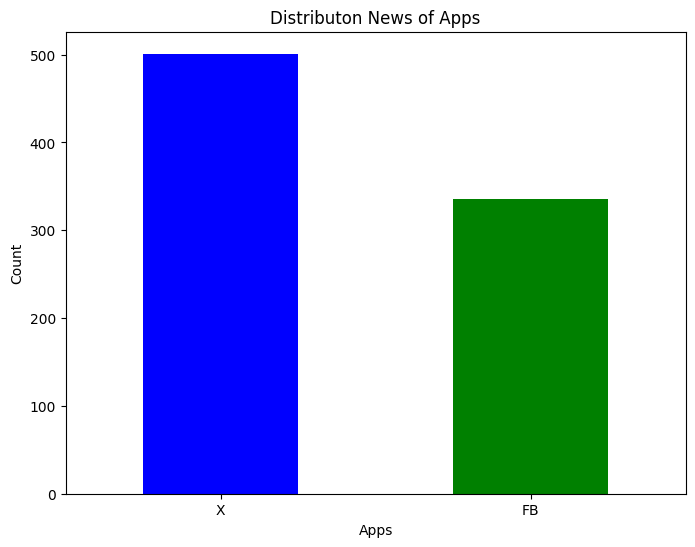

In [ ]:
# Group by 'Apps' column and count occurrences
app_counts = df['Apps'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
app_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Distributon News of Apps')
plt.xlabel('Apps')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of panda

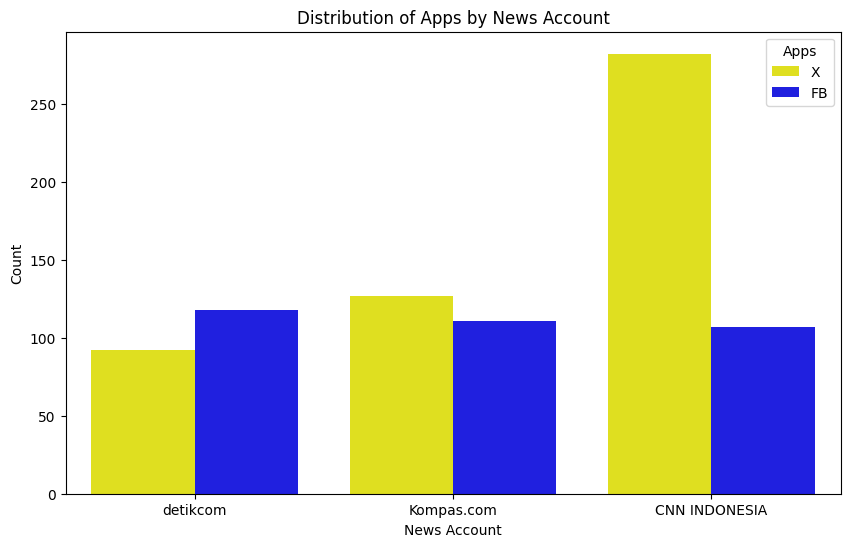

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='News Account', hue='Apps', palette={'FB': 'blue', 'X': 'yellow'})
plt.title('Distribution of Apps by News Account')
plt.xlabel('News Account')
plt.ylabel('Count')
plt.legend(title='Apps')
plt.show()

In [ ]:
# Convert Time column to datetime
df['Time'] = pd.to_datetime(df['Time'], errors = 'coerce')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1000x600 with 0 Axes>

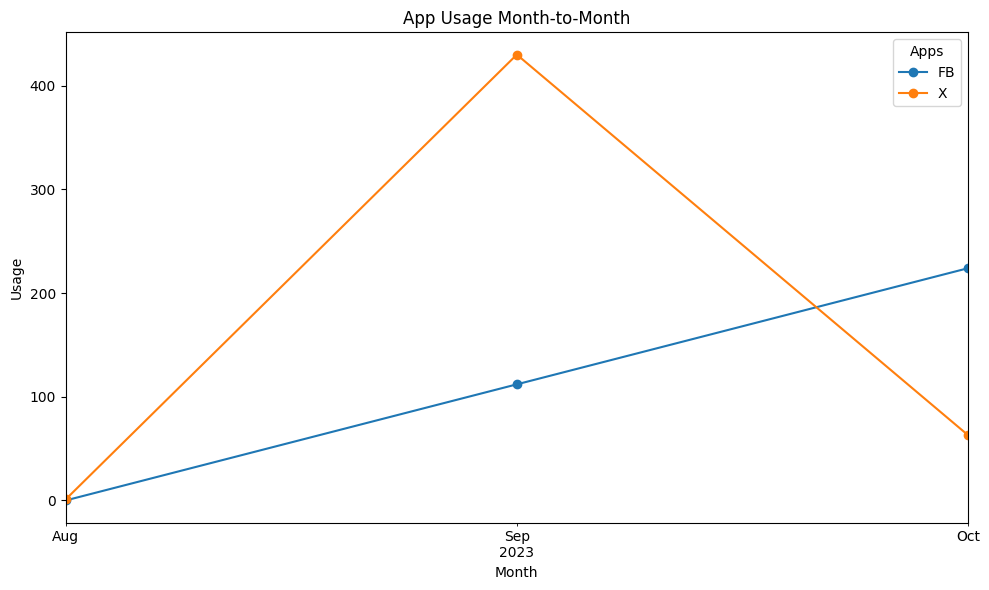

In [ ]:
# Group by month and Apps, and count occurrences
df['Month'] = df['Time'].dt.to_period('M')
grouped = df.groupby(['Month', 'Apps']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
grouped.plot(kind='line', marker='o', figsize=(10,6))

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Usage')
plt.title('App Usage Month-to-Month')
plt.legend(title='Apps')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Preparation

In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Apps', 'Time', 'News Account', 'Headline News', 'Comment Account',
       'Comment', 'Month'],
      dtype='object')

In [ ]:
df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):


,Apps,Time,News Account,Headline News,Comment Account,Comment,Month
No,,,,,,,
747,FB,2023-09-29,CNN INDONESIA,"Menteri Investasi Bahlil Lahadalia, meminta Ti...",Arsid S,Mending blokir pak. Negara maju saja pada miki...,2023-09
783,FB,2023-09-29,CNN INDONESIA,Kementerian Perindustrian (Kemenperin) menduku...,Budi Sumardi,Cetek amat pemikirannye nih Mentri...tugas kal...,2023-09
351,X,2023-09-19,CNN INDONESIA,Pedagang Pasar Tanah Abang Protes dan Desak Ti...,topanmicromart,Jaman sdh berubah..10 thn Lg bs jd Alfmart Ind...,2023-09
141,X,2023-09-26,Kompas.com,Andi (40) salah satu pedagang di Pasar Tanah A...,EKOHADISUSANT15,"kompascom\n Nah, cerdas nih pedagang, setuju ...",2023-09
43,X,2023-09-28,detikcom,Mendag Zulhas ungkap permainan harga di TikTok...,AnjieDrum9836,Ikuti perkembangan teknologi SALAH\n tidak iku...,2023-09


### Data Pre-Processing

In [ ]:
def removeStopword(str):
    stop_words = stopwords.words('indonesian')

    stop_words.extend(["yg", "dg", "rt", "dgn", "ny", "d", "ga", "klo",
                       "kalo", "amp", "biar", "bikin", "bilang", "gak", "g",
                       "krn", "nya", "sih", "si", "tau", "tdk", "utk", "ya",
                       "jd", "jgn", "sdh", "aja", "n", "t", "nyg", "hehe",
                       "pen", "u", "loh", "yah", "gmn", "ttp", "dk", "kn", "dlm", "kl", "b"])
    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)
#remove sentence which contains only one word
def removeSentence(str):
    word = str.split()
    wordCount = len(word)
    if(wordCount<=1):
        str = ''

    return str
def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)

    return str
def preprocessing(str):
    str = removeSentence(str)
    str = cleaning(str)
    str = removeStopword(str)

    return str

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:28: DeprecationWarning: invalid escape sequence '\S'
<>:34: DeprecationWarning: invalid escape sequence '\s'
<>:28: DeprecationWarning: invalid escape sequence '\S'
<>:34: DeprecationWarning: invalid escape sequence '\s'
<ipython-input-16-ff9fb8b6475b>:28: DeprecationWarning: invalid escape sequence '\S'
  str = re.sub("\S*\d\S*", "", str).strip()
<ipython-input-16-ff9fb8b6475b>:34: DeprecationWarning: invalid escape sequence '\s'
  str = re.sub('[\s]+', ' ', str)


In [ ]:
#test the code
sentences = ["dimana lokasi kuliner jogja yang murah","alamat gudeg yu djum dimana sih, yang enak","s"]
for st in sentences:
    r = preprocessing(st)
    print(r)

dimana lokasi kuliner jogja murah
alamat gudeg yu djum dimana enak



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_copy = df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_copy['Headline News'] = df_copy['Headline News'].apply(lambda x: preprocessing(x))
df_copy['Comment'] = df_copy['Comment'].apply(lambda x: preprocessing(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_copy.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):


,Apps,Time,News Account,Headline News,Comment Account,Comment,Month
No,,,,,,,
516,FB,2023-09-27,detikcom,kemarin dilarang kasih seminggu sosialisasi be...,Ahmad Saidi,tutup diakun medsosnya ky shopee tokped silahkan,2023-09
309,X,2023-09-19,CNN INDONESIA,pedagang pasar tanah abang bawa poster desak t...,Irkaaa____,efek pedagang pasar jualan seenak jidat naikin...,2023-09
354,X,2023-09-19,CNN INDONESIA,teriak pedagang pasar tanah abang desak tiktok...,celciusxyz,sebenernya tiktok shop produsen ikutan jualan ...,2023-09
13,X,2023-09-28,detikcom,tiktok shop dilarang tiktok indonesia angkat b...,Bola_hari_ini,promosi kaya jaman fb live ig live promosiin b...,2023-09
106,X,2023-09-25,Kompas.com,presiden jokowi dampak bisnis e commerce salah...,masmur,tiktok shop keliatan tuh toped shopee ngambil ...,2023-09


In [ ]:
comment_text = df_copy['Comment'].tolist()
headline_text = df_copy['Headline News'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(comment_text[5])

aduh gawat beli barang situ


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Remove Punctuation from Data

In [ ]:
punct = string.punctuation

def remove_punctuation(text):
    no_punct= [words for words in text if words not in punct]
    words_wo_punct = ''.join(no_punct)

    return words_wo_punct

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_copy['Punct'] = df_copy['Comment'].apply(lambda x: remove_punctuation(x))
df_copy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):


,Apps,Time,News Account,Headline News,Comment Account,Comment,Month,Punct
No,,,,,,,,
1,X,2023-09-16,detikcom,pdip dki dicurhati pedagang pasar tanah abang ...,ramly12313271,tanah abang sepi kampung,2023-09,tanah abang sepi kampung
2,X,2023-09-24,detikcom,tiktok shop dilarang diatur ketat faktanya,unclejhonma,perumpamaan banyakiinjualan,2023-09,perumpamaan banyakiinjualan
3,X,2023-09-25,detikcom,presiden jokowi menggelar rapat terbatas pagi ...,aminoto7,stafsus milenial diajak,2023-09,stafsus milenial diajak
4,X,2023-09-25,detikcom,presiden jokowi menggelar rapat terbatas pagi ...,MDani71637850,daya beli kolaps duit makan be diirit tercukup...,2023-09,daya beli kolaps duit makan be diirit tercukup...
5,X,2023-09-25,detikcom,presiden jokowi menggelar rapat terbatas pagi ...,Sparkplugs98,perkara tiktok shop ampe bahas istana,2023-09,perkara tiktok shop ampe bahas istana


### Stemming

In [ ]:
def repair_exaggeration(x):
    word_tokens = word_tokenize(x)
    new_x =''
    for i in word_tokens:
        if (i =='psbb'):
            new = re.sub(r'(\w)\1\1+',r'\1\1',i)
            new_x = new_x +new+' '
        elif(i =='psb'):
            new = 'psbb'
            new_x = new_x +new+' '
        else:
            new = re.sub(r'(\w)\1\1\1+',r'\1',i)
            new_x = new_x +new+' '
    return new_x

def del_word(x,key_list):
    n = len(key_list)
    word_tokens = word_tokenize(x)
    new_x =''
    for word in word_tokens:
        if word not in key_list:
            new_x = new_x+word+' '
    return new_x

def clean_tweets(tweet):
   # nltk.download('stopwords')
    my_file = open("combined_stop_words.txt", "r")
    content = my_file.read()
    stop_words = content.split("\n")

    file_2  = open("combined_slang_words.txt", "r")
    content2 = file_2.read()
    slang_words = ast.literal_eval(content2)
    my_file.close()
    file_2.close()

    tweet = tweet.lower()
    #after tweepy preprocessing the colon left remain after removing mentions or RT sign in the beginning of the tweet
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

    #remove punctuation manually
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)

    #remove tags
    tweet=re.sub("&lt;/?.*?&gt;","&lt;&gt;",tweet)

    #remove digits and special chars
    tweet=re.sub("(\\d|\\W)+"," ",tweet)

    #remove other symbol from tweet
    tweet = re.sub(r'â', '', tweet)
    tweet = re.sub(r'€', '', tweet)
    tweet = re.sub(r'¦', '', tweet)

    word_tokens = word_tokenize(tweet)
    for w in word_tokens:
        if w in slang_words.keys():
            word_tokens[word_tokens.index(w)] = slang_words[w]

    #filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []

    #looping through conditions
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in string.punctuation:
            filtered_tweet.append(w.lower())
    return ' '.join(filtered_tweet)

def count_words(x):
    words = word_tokenize(x)
    n=len(words)
    return n

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Call the repair exaggeration function
clean_text_exag = df_copy['Comment'].apply(lambda x: repair_exaggeration(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Call the Cleantweet function
re_clean = clean_text_exag.apply(lambda x: clean_tweets(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Add the "cleaned tweet" data in original dataset
df_copy["clean_tweet"] = re_clean

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_feature = df_copy.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_copy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):


,Apps,Time,News Account,Headline News,Comment Account,Comment,Month,Punct,clean_tweet
No,,,,,,,,,
1,X,2023-09-16,detikcom,pdip dki dicurhati pedagang pasar tanah abang ...,ramly12313271,tanah abang sepi kampung,2023-09,tanah abang sepi kampung,tanah abang sepi kampung
2,X,2023-09-24,detikcom,tiktok shop dilarang diatur ketat faktanya,unclejhonma,perumpamaan banyakiinjualan,2023-09,perumpamaan banyakiinjualan,perumpamaan banyakiinjualan
3,X,2023-09-25,detikcom,presiden jokowi menggelar rapat terbatas pagi ...,aminoto7,stafsus milenial diajak,2023-09,stafsus milenial diajak,stafsus milenial diajak
4,X,2023-09-25,detikcom,presiden jokowi menggelar rapat terbatas pagi ...,MDani71637850,daya beli kolaps duit makan be diirit tercukup...,2023-09,daya beli kolaps duit makan be diirit tercukup...,daya beli kolaps duit makan be diirit tercukup...
5,X,2023-09-25,detikcom,presiden jokowi menggelar rapat terbatas pagi ...,Sparkplugs98,perkara tiktok shop ampe bahas istana,2023-09,perkara tiktok shop ampe bahas istana,perkara tiktok shop ampe bahas istana
...,...,...,...,...,...,...,...,...,...
833,FB,2023-10-09,CNN INDONESIA,tiktok shop resmi ditutup pemerintah rabu okto...,Edytakedo,perkembangan zaman teknologi berkembang maju b...,2023-10,perkembangan zaman teknologi berkembang maju b...,perkembangan zaman teknologi berkembang maju b...
834,FB,2023-10-09,CNN INDONESIA,tiktok shop resmi ditutup pemerintah rabu okto...,Siti Cixi Cixi,alhmdllh terimakasih karna pemerintah dijalan ...,2023-10,alhmdllh terimakasih karna pemerintah dijalan ...,alhmdllh terimakasih pemerintah dijalan tutup ...
835,FB,2023-10-09,CNN INDONESIA,tiktok shop resmi ditutup pemerintah rabu okto...,Eriyanto Yanto,sbtulnya pemerintah pasar jual beli dipasar on...,2023-10,sbtulnya pemerintah pasar jual beli dipasar on...,sbtulnya pemerintah pasar jual beli dipasar on...


### Create word Dictionary

In [ ]:
# Check if "Comment" column exists in the DataFrame
if "Comment" in df_copy.columns:
    word_dict = {}

    # Iterate over the rows of the DataFrame
    for i in range(len(df_copy)):
        # Get the comment from the "Comment" column
        comment = df_copy["Comment"].iloc[i]

        # Check if the comment is not NaN and is a string
        if isinstance(comment, str):
            # Tokenize the comment into words
            word_tokens = word_tokenize(comment)

            # Update the word dictionary
            for word in word_tokens:
                if word not in word_dict:
                    word_dict[word] = 1
                else:
                    word_dict[word] += 1
else:
    print("Column 'Comment' does not exist in the DataFrame.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


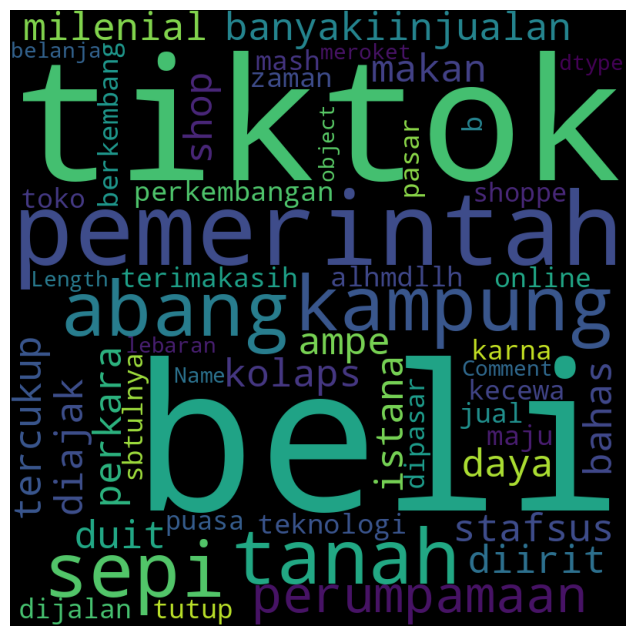

In [ ]:
# Wordcloud from cleaned data
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      , min_font_size = 20).generate(str(df_copy["Comment"]))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# Drop column
columns_to_drop = ['Punct', 'Puncht_Stemmed']
existing_columns = df_copy.columns

columns_to_drop_existing = [col for col in columns_to_drop if col in existing_columns]

if columns_to_drop_existing:
    # Drop the columns
    df_copy.drop(columns=columns_to_drop_existing, inplace=True)
    print("Columns", columns_to_drop_existing, "have been dropped.")
else:
    print("Columns", columns_to_drop, "do not exist in the DataFrame.")

Columns ['Punct'] have been dropped.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 4. Topic Modeling using LDA

## Topic Modelling X and FB

In [ ]:
# Separate DataFrames for each unique value in the 'Apps' column
df_X = df_copy[df_copy['Apps'] == 'X']
df_FB = df_copy[df_copy['Apps'] == 'FB']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_X.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):


,Apps,Time,News Account,Headline News,Comment Account,Comment,Month,clean_tweet
No,,,,,,,,
276,X,2023-09-12,CNN INDONESIA,larang tiktok shop pemerintah siapkan satgas t...,bossnya,membunuh ojek pengkolan tergusur ojek online s...,2023-09,membunuh ojek pengkolan tergusur ojek online s...
411,X,2023-09-23,CNN INDONESIA,jokowi tiktok shop mestinya media sosial media...,Razieq97,permasalahan utamanya daya beli rakyat turun d...,2023-09,permasalahan utamanya daya beli rakyat turun d...
84,X,2023-10-10,detikcom,tiktok shop ditutup rabu pedagang pasar tanah ...,el_saintx,ramai penuh sesak donggg,2023-10,ramai penuh sesak donggg
58,X,2023-09-28,detikcom,crazy rich surabaya tom liwafa setuju larangan...,feshdx,klw lu mengembalikan putaran uang pasar tradis...,2023-09,mengembalikan putaran uang pasar tradisional p...
472,X,2023-09-24,CNN INDONESIA,jokowi tiktok shop omset pasar umkm anjlok,rizkyprtam16,mnrt pemerintah hrs terobosan umkm spy kalah t...,2023-09,mnrt pemerintah terobosan umkm kalah tiktok sh...


In [ ]:
df_FB.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(column):


,Apps,Time,News Account,Headline News,Comment Account,Comment,Month,clean_tweet
No,,,,,,,,
590,FB,2023-10-05,detikcom,tiktok shop resmi ditutup reaksi pemilik brand...,Jho Aza Feat Maya,tutupun msh instagram tweter fb wa dll,2023-10,tutupun instagram tweter fb wa dan lain-lain
736,FB,2023-09-29,CNN INDONESIA,menteri investasi bahlil lahadalia menyebut ti...,Niken,,2023-09,
536,FB,2023-09-29,detikcom,crazy rich surabaya tom liwafa setuju larangan...,Emalkul,daya beli menurun karna uangnya judi online,2023-09,daya beli menurun uangnya judi online
822,FB,2023-10-09,CNN INDONESIA,tiktok shop resmi ditutup pemerintah rabu okto...,Goofy Vicky,tinggal serentak ramein shoope lazada terbiasa...,2023-10,serentak ramein shoope lazada terbiasa konsume...
784,FB,2023-09-29,CNN INDONESIA,kementerian perindustrian kemenperin mendukung...,Ahmad Faisal,tiktok emang salah pengaruh lemah pasar lemah ...,2023-09,tiktok salah pengaruh lemah pasar lemah daya b...


In [ ]:
# Extract the 'clean_tweet' column
comment_text_x = df_X['clean_tweet']
comment_text_fb = df_FB['clean_tweet']

# Tokenize articles
tokenize_article_x = comment_text_x.apply(lambda x: x.split())
tokenize_article_fb = comment_text_fb.apply(lambda x: x.split())

# Create a dictionary
id2word_x = corpora.Dictionary(tokenize_article_x)
id2word_fb = corpora.Dictionary(tokenize_article_fb)

# Create Corpus
texts_x = tokenize_article_x
texts_fb = tokenize_article_fb

# Term Document Frequency
corpus_x = [id2word_x.doc2bow(text) for text in texts_x]
corpus_fb = [id2word_fb.doc2bow(text) for text in texts_fb]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Train LDA model for X
lda_model_x = LdaModel(corpus_x, num_topics=5, id2word=id2word_x)

# Train LDA model for FB
lda_model_fb = LdaModel(corpus_fb, num_topics=5, id2word=id2word_fb)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compare similarity between topics using Jaccard Index
lda_index_x = similarities.MatrixSimilarity(lda_model_x[corpus_x])
lda_index_fb = similarities.MatrixSimilarity(lda_model_fb[corpus_fb])

# Print Jaccard similarity matrix
print("Jaccard Similarity between topics of X and FB:")
print(lda_index_x.index[:10][:10])

Jaccard Similarity between topics of X and FB:
[[0.99532115 0.04823685 0.04775478 0.04838498 0.04886044]
 [0.0895016  0.0894938  0.98385006 0.08949498 0.08949878]
 [0.9922111  0.06249704 0.06209165 0.06237924 0.0621664 ]
 [0.01170941 0.01194688 0.99972016 0.01183834 0.01181872]
 [0.03288517 0.9978442  0.03268329 0.03321461 0.03246719]
 [0.99688995 0.03997923 0.03924853 0.03962843 0.03874543]
 [0.9990148  0.02216393 0.02212486 0.02214136 0.02232722]
 [0.0327196  0.03232927 0.99789333 0.03242655 0.03227448]
 [0.021962   0.02197072 0.9990287  0.02218943 0.02200673]
 [0.01260877 0.01283049 0.01252647 0.9996801  0.01261611]]


In [ ]:
# Get the sizes of the similarity arrays
size_x = len(lda_index_x.index)
size_fb = len(lda_index_fb.index)

print(size_x, size_fb)

501 336


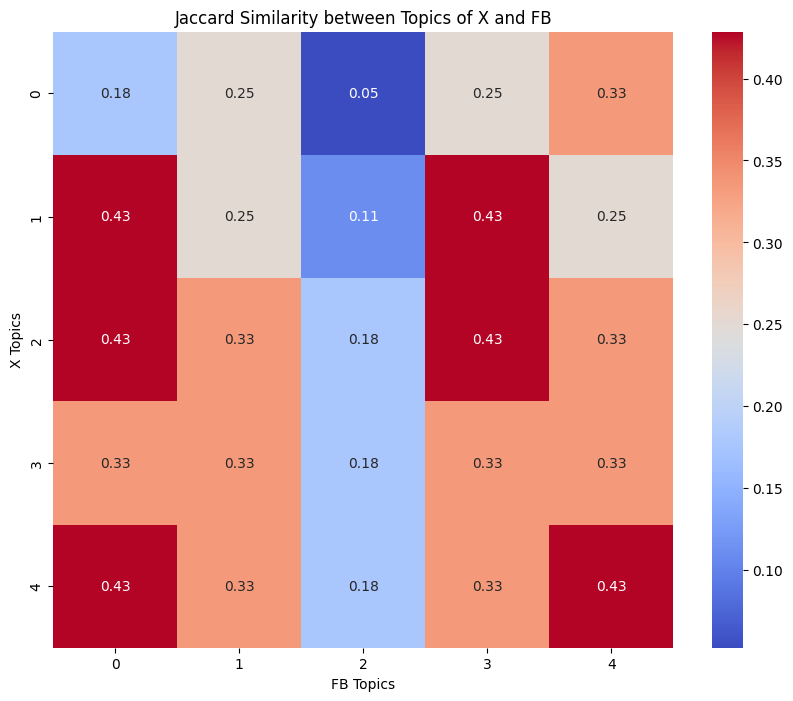

In [ ]:
def extract_top_words_per_topic(lda_model, topn=10):
    """
    Extracts the top N words for each topic from the LDA model.
    Returns a list of sets, each corresponding to a topic.
    """
    top_words = []
    for topic_id in range(lda_model.num_topics):
        top_words_topic = set(word for word, _ in lda_model.show_topic(topic_id, topn=topn))
        top_words.append(top_words_topic)
    return top_words

def compute_jaccard_similarity(set1, set2):
    """
    Computes the Jaccard similarity between two sets.
    """
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

# Extract top words for each topic
top_words_x = extract_top_words_per_topic(lda_model_x)
top_words_fb = extract_top_words_per_topic(lda_model_fb)

# Compute Jaccard similarities
similarity_matrix = np.zeros((len(top_words_x), len(top_words_fb)))
for i, words_x in enumerate(top_words_x):
    for j, words_fb in enumerate(top_words_fb):
        similarity_matrix[i, j] = compute_jaccard_similarity(words_x, words_fb)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Jaccard Similarity between Topics of X and FB')
plt.xlabel('FB Topics')
plt.ylabel('X Topics')
plt.show()

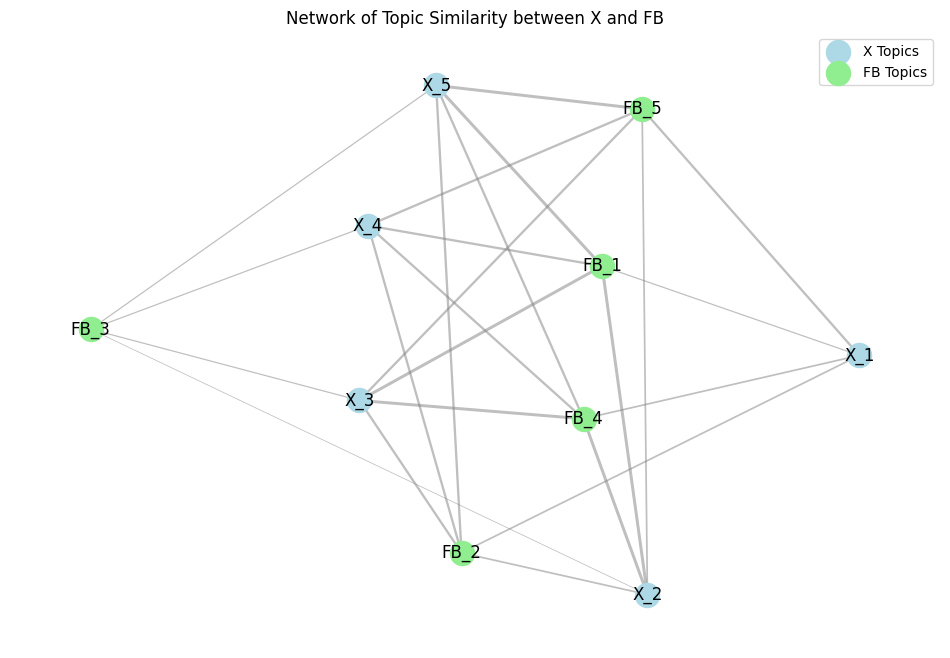

In [ ]:
def create_similarity_graph(similarity_matrix, threshold=0.1):
    """
    Creates a graph from the similarity matrix. Nodes represent topics from both models,
    and edges represent similarities above the given threshold.
    """
    G = nx.Graph()

    num_topics_x = similarity_matrix.shape[0]
    num_topics_fb = similarity_matrix.shape[1]

    # Add nodes with different labels for distinction
    for i in range(num_topics_x):
        G.add_node(f"X_{i+1}", group='X')
    for j in range(num_topics_fb):
        G.add_node(f"FB_{j+1}", group='FB')

    # Add edges based on similarity scores
    for i in range(num_topics_x):
        for j in range(num_topics_fb):
            weight = similarity_matrix[i, j]
            if weight > threshold:  # Only consider similarities above the threshold
                G.add_edge(f"X_{i+1}", f"FB_{j+1}", weight=weight)

    return G

# Create the graph
G = create_similarity_graph(similarity_matrix)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if G.nodes[n]['group'] == 'X'], node_color='lightblue', label='X Topics')
nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if G.nodes[n]['group'] == 'FB'], node_color='lightgreen', label='FB Topics')

# Draw edges
edges = G.edges(data=True)
weights = [G[u][v]['weight'] * 5 for u, v, d in edges]  # Multiply weight for visualization
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5, edge_color="gray")

# Draw node labels
nx.draw_networkx_labels(G, pos)

plt.title('Network of Topic Similarity between X and FB')
plt.legend(scatterpoints=1)
plt.axis('off')
plt.show()

## Topic Modelling All

In [ ]:
# Extract the 'clean_tweet' column
comment_text = df_copy['clean_tweet']

# Tokenize articles
tokenize_article = comment_text.apply(lambda x: x.split())

# Create a dictionary
id2word = corpora.Dictionary(tokenize_article)

# Create Corpus
texts = tokenize_article

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Printing 50 words from the text corpus
corpus_example = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]
corpus_example[0][:50]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('abang', 1), ('kampung', 1), ('sepi', 1), ('tanah', 1)]

In [ ]:
comment_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No
1                               tanah abang sepi kampung
2                            perumpamaan banyakiinjualan
3                                stafsus milenial diajak
4      daya beli kolaps duit makan be diirit tercukup...
5                  perkara tiktok shop ampe bahas istana
                             ...                        
833    perkembangan zaman teknologi berkembang maju b...
834    alhmdllh terimakasih pemerintah dijalan tutup ...
835    sbtulnya pemerintah pasar jual beli dipasar on...
836    kecewa tiktok tutup mash toko online shoppe to...
837                        puasa belanja lebaran meroket
Name: clean_tweet, Length: 837, dtype: object

In [ ]:
# Build LDA model for 5 topic
NUM_TOPICS = 5
LDA_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=NUM_TOPICS,
                     random_state=100,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='symmetric',
                     per_word_topics=True,
                     eta = 0.6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the Keyword in the 5 topics
pprint(LDA_model.print_topics())
doc_lda = LDA_model[corpus]

[(0,
  '0.020*"indonesia" + 0.014*"tiktok" + 0.013*"negara" + 0.010*"aplikasi" + '
  '0.010*"kebijakan" + 0.009*"pemerintah" + 0.008*"dan" + 0.008*"lain-lain" + '
  '0.007*"produk" + 0.006*"lokal"'),
 (1,
  '0.008*"e" + 0.008*"sosmed" + 0.007*"commerce" + 0.007*"pajak" + '
  '0.005*"tutup" + 0.004*"tiktokshop" + 0.004*"baik" + 0.004*"lebih" + '
  '0.003*"mentri" + 0.003*"males"'),
 (2,
  '0.023*"online" + 0.022*"tiktok" + 0.016*"shop" + 0.016*"pasar" + '
  '0.013*"tutup" + 0.012*"harga" + 0.012*"jualan" + 0.011*"beli" + '
  '0.011*"pedagang" + 0.011*"murah"'),
 (3,
  '0.007*"umkm" + 0.005*"rakyat" + 0.005*"lebaran" + 0.005*"hancur" + '
  '0.004*"resselernya" + 0.004*"berasa" + 0.004*"tertipkan" + 0.003*"seneng" + '
  '0.003*"jokowi" + 0.003*"makan"'),
 (4,
  '0.024*"tanah" + 0.023*"abang" + 0.003*"pasar" + 0.003*"tikar" + '
  '0.003*"gulung" + 0.002*"parkir" + 0.002*"mmaaahhhl" + 0.002*"mahhal" + '
  '0.002*"sempak" + 0.002*"semmppaak"')]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Build LDA model for 5 topic
def calculate_coherence_and_perplexity(n):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenize_article, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    perplexity = lda_model.log_perplexity(corpus)

    return coherence_lda, perplexity

results = []

NUM_TOPICS = 5

for n in range(1, NUM_TOPICS + 1):  # Corrected range
    coherence_score, perplexity_score = calculate_coherence_and_perplexity(n)
    results.append((n, coherence_score, perplexity_score))

# Unpack results for visualization
topics, coherence_scores, perplexity_scores = zip(*results)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


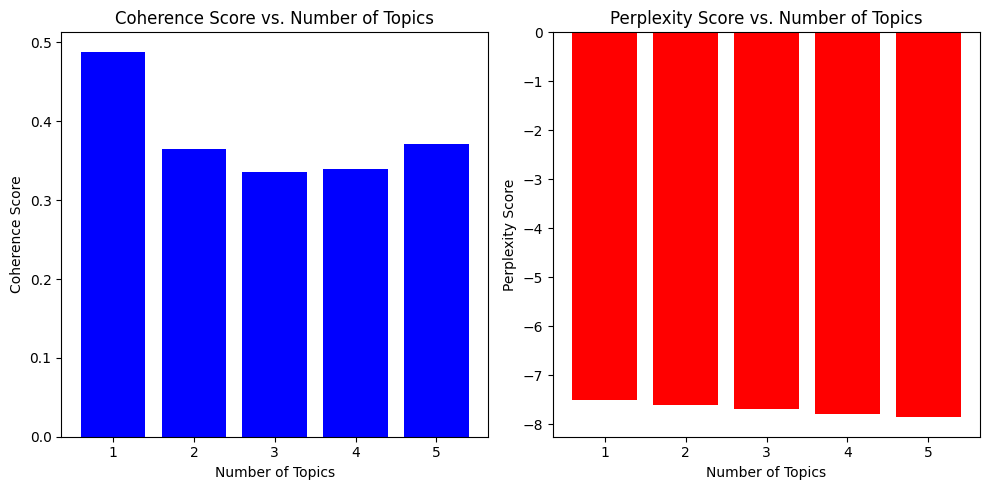

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Coherence Score
plt.subplot(1, 2, 1)
plt.bar(topics, coherence_scores, color='blue')
plt.title('Coherence Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

# Perplexity
plt.subplot(1, 2, 2)
plt.bar(topics, perplexity_scores, color='red')
plt.title('Perplexity Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')

plt.tight_layout()
plt.show()

In [ ]:
# Visualize the topics
vis = pyLDAvis.gensim.prepare(LDA_model, corpus, id2word)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Extract topic-word distribution
topic_word_dists = LDA_model.get_topics()

# Initialize co-occurrence matrix
num_words = len(id2word)
co_occurrence_matrix = np.zeros((num_words, num_words))

# Function to find dominant topic in a document
def get_dominant_topic(doc):
    topic_dist = LDA_model.get_document_topics(doc)
    dominant_topic = max(topic_dist, key=lambda x: x[1])[0]
    return dominant_topic

# Iterate through each document in the corpus
for doc in corpus:
    dominant_topic = get_dominant_topic(doc)
    for word_id, word_count in doc:
        for other_word_id, other_word_count in doc:
            if word_id != other_word_id:
                co_occurrence_matrix[word_id, other_word_id] += topic_word_dists[dominant_topic, other_word_id] * word_count

# Optional: Normalize the co-occurrence matrix
co_occurrence_matrix /= np.sum(co_occurrence_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of nodes in the graph: 100
Number of edges added to the graph: 6670


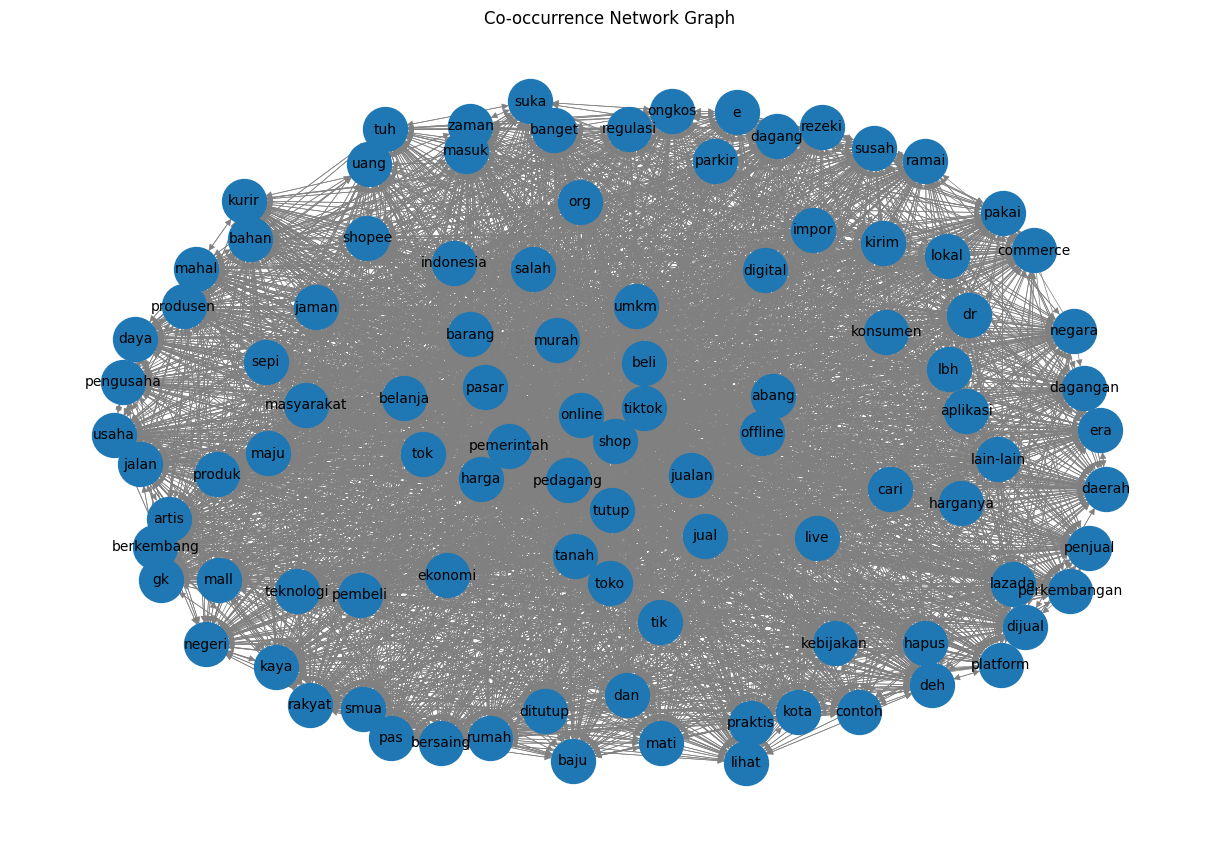

In [ ]:
# Limit the number of nodes by considering only the top N most frequent words
top_n_words = 100  # Adjust this value as needed
top_n_words_indices = np.argsort(-np.sum(co_occurrence_matrix, axis=1))[:top_n_words]

# Create a directed graph
G = nx.DiGraph()

# Populate the graph with co-occurrence relationships for top N words
threshold = 1e-6  # Set a lower threshold to include more edges in the graph
num_edges_added = 0
for i in top_n_words_indices:
    for j in top_n_words_indices:
        weight = co_occurrence_matrix[i, j]
        if weight > threshold:
            G.add_edge(id2word[i], id2word[j], weight=weight)
            num_edges_added += 1

# Diagnostic: Print number of nodes and edges added to the graph
print("Number of nodes in the graph:", G.number_of_nodes())
print("Number of edges added to the graph:", num_edges_added)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout the graph using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=10, font_color='black', edge_color='gray', width=0.5)
plt.title('Co-occurrence Network Graph')
plt.show()

# 5. Sentiment Analysis using IndoROBERTa

In [ ]:
df_feature = df_feature[['Apps', 'Headline News', 'clean_tweet']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_feature

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Apps,Headline News,clean_tweet
No,,,
1,X,pdip dki dicurhati pedagang pasar tanah abang ...,tanah abang sepi kampung
2,X,tiktok shop dilarang diatur ketat faktanya,perumpamaan banyakiinjualan
3,X,presiden jokowi menggelar rapat terbatas pagi ...,stafsus milenial diajak
4,X,presiden jokowi menggelar rapat terbatas pagi ...,daya beli kolaps duit makan be diirit tercukup...
5,X,presiden jokowi menggelar rapat terbatas pagi ...,perkara tiktok shop ampe bahas istana
...,...,...,...
833,FB,tiktok shop resmi ditutup pemerintah rabu okto...,perkembangan zaman teknologi berkembang maju b...
834,FB,tiktok shop resmi ditutup pemerintah rabu okto...,alhmdllh terimakasih pemerintah dijalan tutup ...
835,FB,tiktok shop resmi ditutup pemerintah rabu okto...,sbtulnya pemerintah pasar jual beli dipasar on...


### Sentiment Analysis menggunakan IndoROBERTa


In [ ]:
# Load pretrained model indoROBERTa
pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"

nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
# Predict Headline Newse Sentiment Analysis

# Define a function to apply your NLP model to each headline
def predict_sentiment(text):
    try:
        result = nlp(text)
        return result[0]['label']
    except RuntimeError as e:
        return 'neutral'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply the function to each row in the 'Headline News' column
df_feature['Headline_sentiment_prediction'] = df_feature['Headline News'].apply(predict_sentiment)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply the function to 'Comment'
df_feature['Comment_sentiment_prediction'] = df_feature['clean_tweet'].apply(predict_sentiment)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_feature

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Apps,Headline News,clean_tweet,Headline_sentiment_prediction,Comment_sentiment_prediction
No,,,,,
1,X,pdip dki dicurhati pedagang pasar tanah abang ...,tanah abang sepi kampung,neutral,negative
2,X,tiktok shop dilarang diatur ketat faktanya,perumpamaan banyakiinjualan,negative,positive
3,X,presiden jokowi menggelar rapat terbatas pagi ...,stafsus milenial diajak,neutral,neutral
4,X,presiden jokowi menggelar rapat terbatas pagi ...,daya beli kolaps duit makan be diirit tercukup...,neutral,neutral
5,X,presiden jokowi menggelar rapat terbatas pagi ...,perkara tiktok shop ampe bahas istana,neutral,neutral
...,...,...,...,...,...
833,FB,tiktok shop resmi ditutup pemerintah rabu okto...,perkembangan zaman teknologi berkembang maju b...,neutral,positive
834,FB,tiktok shop resmi ditutup pemerintah rabu okto...,alhmdllh terimakasih pemerintah dijalan tutup ...,neutral,neutral
835,FB,tiktok shop resmi ditutup pemerintah rabu okto...,sbtulnya pemerintah pasar jual beli dipasar on...,neutral,positive


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


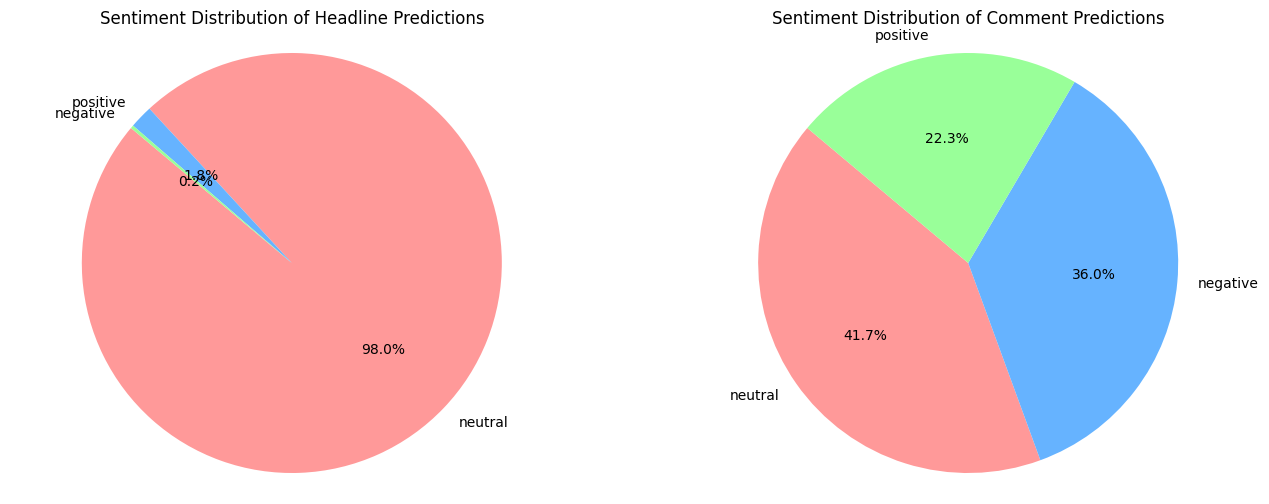

In [ ]:
# Data untuk Headline_sentiment_prediction
labels_headline = df_feature['Headline_sentiment_prediction'].value_counts().index
sizes_headline = df_feature['Headline_sentiment_prediction'].value_counts().values

# Data untuk Comment_sentiment_prediction
labels_comment = df_feature['Comment_sentiment_prediction'].value_counts().index
sizes_comment = df_feature['Comment_sentiment_prediction'].value_counts().values

# Warna untuk kedua pie chart
colors = ['#ff9999','#66b3ff','#99ff99']

# Plotting kedua pie chart dalam satu gambar
plt.figure(figsize=(16, 6))

# Pie chart untuk Headline_sentiment_prediction
plt.subplot(1, 2, 1)
plt.pie(sizes_headline, labels=labels_headline, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Headline Predictions')
plt.axis('equal')  # Pastikan pie chart berbentuk lingkaran

# Pie chart untuk Comment_sentiment_prediction
plt.subplot(1, 2, 2)
plt.pie(sizes_comment, labels=labels_comment, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Comment Predictions')
plt.axis('equal')  # Pastikan pie chart berbentuk lingkaran

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


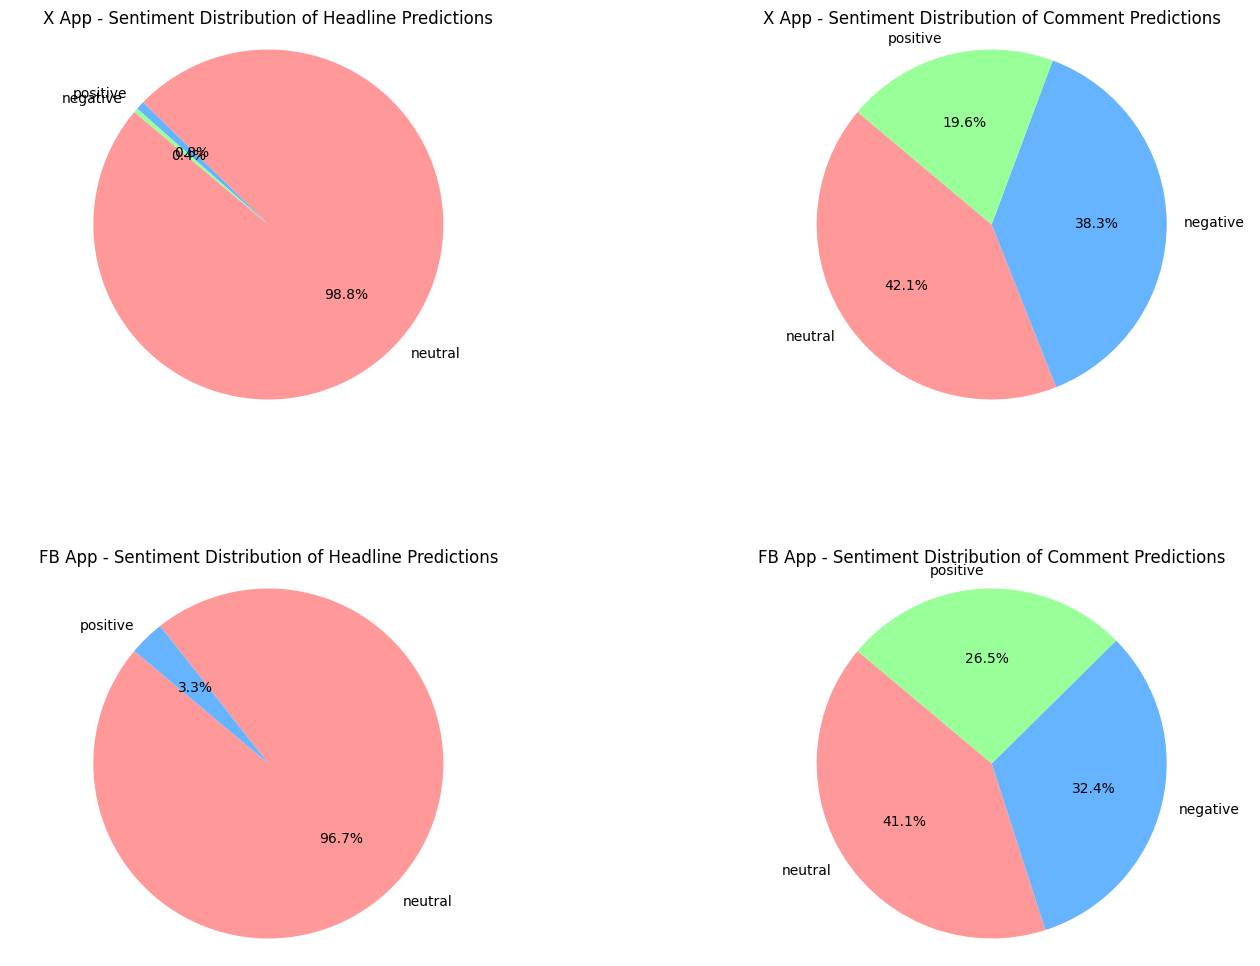

In [ ]:
import matplotlib.pyplot as plt

# Separate DataFrames for each unique value in the 'Apps' column
df_X = df_feature[df_feature['Apps'] == 'X']
df_FB = df_feature[df_feature['Apps'] == 'FB']

# Data for X App's Headline_sentiment_prediction
labels_headline_X = df_X['Headline_sentiment_prediction'].value_counts().index
sizes_headline_X = df_X['Headline_sentiment_prediction'].value_counts().values

# Data for X App's Comment_sentiment_prediction
labels_comment_X = df_X['Comment_sentiment_prediction'].value_counts().index
sizes_comment_X = df_X['Comment_sentiment_prediction'].value_counts().values

# Data for FB App's Headline_sentiment_prediction
labels_headline_FB = df_FB['Headline_sentiment_prediction'].value_counts().index
sizes_headline_FB = df_FB['Headline_sentiment_prediction'].value_counts().values

# Data for FB App's Comment_sentiment_prediction
labels_comment_FB = df_FB['Comment_sentiment_prediction'].value_counts().index
sizes_comment_FB = df_FB['Comment_sentiment_prediction'].value_counts().values

# Colors for the pie charts
colors = ['#ff9999','#66b3ff','#99ff99']

# Plotting the pie charts
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Pie chart for X App's Headline_sentiment_prediction
axs[0, 0].pie(sizes_headline_X, labels=labels_headline_X, colors=colors, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('X App - Sentiment Distribution of Headline Predictions')
axs[0, 0].axis('equal')

# Pie chart for X App's Comment_sentiment_prediction
axs[0, 1].pie(sizes_comment_X, labels=labels_comment_X, colors=colors, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('X App - Sentiment Distribution of Comment Predictions')
axs[0, 1].axis('equal')

# Pie chart for FB App's Headline_sentiment_prediction
axs[1, 0].pie(sizes_headline_FB, labels=labels_headline_FB, colors=colors, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('FB App - Sentiment Distribution of Headline Predictions')
axs[1, 0].axis('equal')

# Pie chart for FB App's Comment_sentiment_prediction
axs[1, 1].pie(sizes_comment_FB, labels=labels_comment_FB, colors=colors, autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('FB App - Sentiment Distribution of Comment Predictions')
axs[1, 1].axis('equal')

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()